In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [7]:
Kyphosis_df = pd.read_csv('/content/drive/MyDrive/Content/kyphosis.csv')

In [8]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [9]:
Kyphosis_df.info

<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [11]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [12]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [13]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [14]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<Axes: >

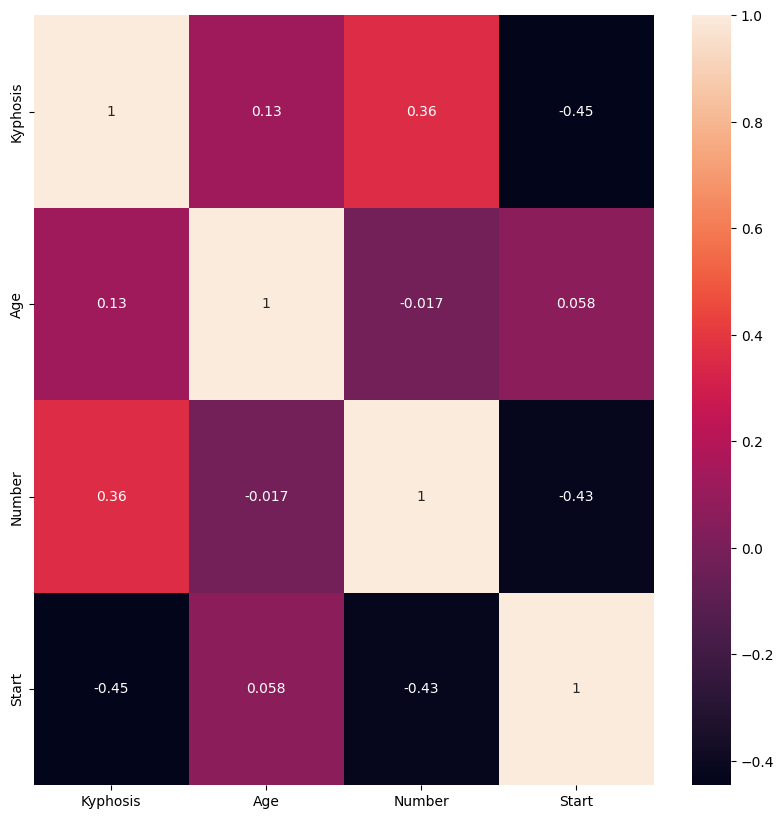

In [15]:
plt.figure(figsize=(10,10))

sns.heatmap(Kyphosis_df.corr(),annot=True)

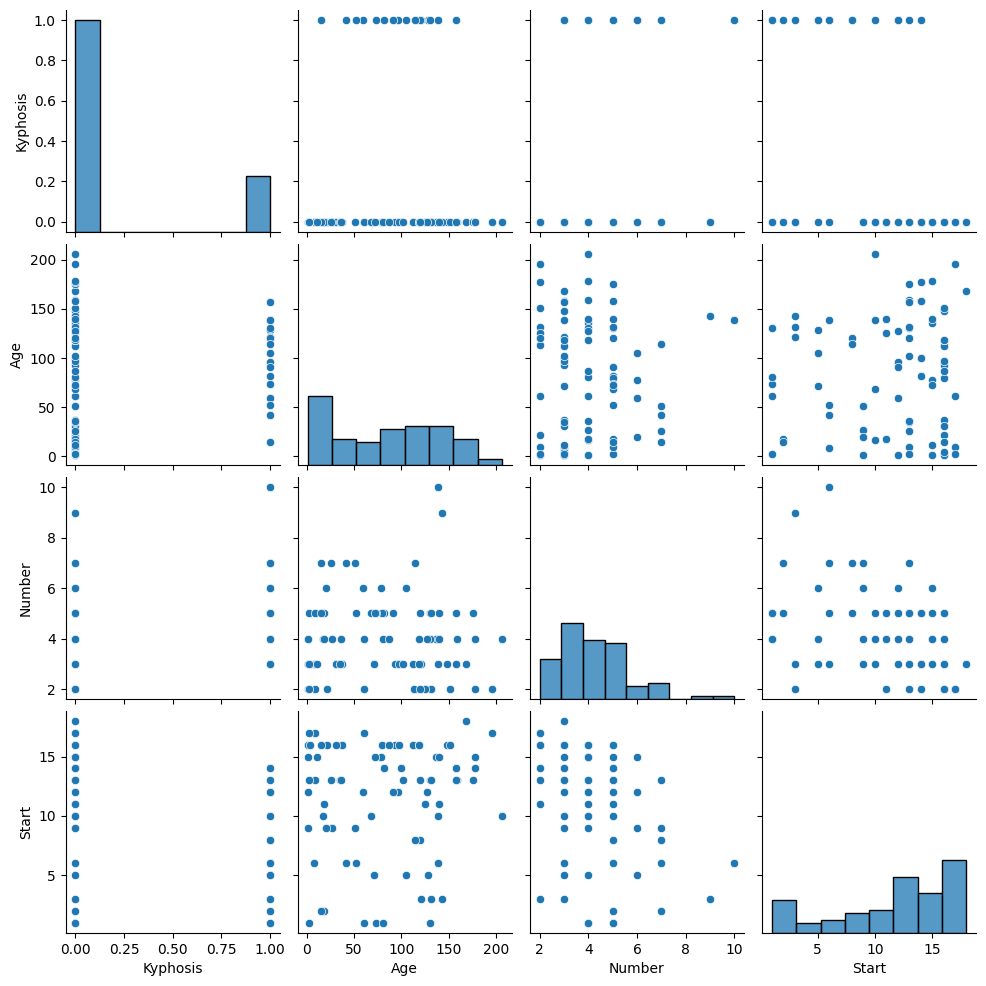

In [16]:
sns.pairplot(Kyphosis_df)

In [17]:
x=Kyphosis_df.drop(['Kyphosis'],axis=1)
y=Kyphosis_df['Kyphosis']

In [18]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [19]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
x_train.shape

(64, 3)

In [23]:
y_train.shape

(64,)

In [24]:
x_test.shape

(17, 3)

In [25]:
y_test.shape

(17,)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

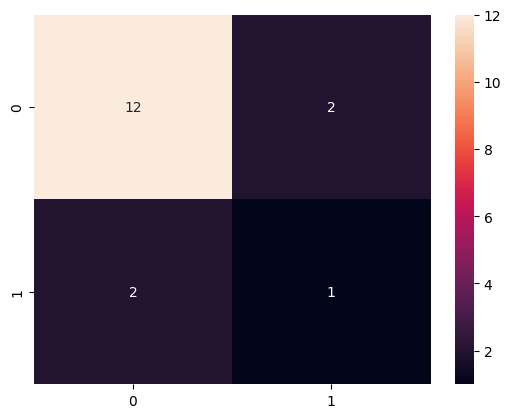

In [29]:
y_predict_test=model.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [30]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.33      0.33      0.33         3

    accuracy                           0.76        17
   macro avg       0.60      0.60      0.60        17
weighted avg       0.76      0.76      0.76        17



In [31]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

<Axes: >

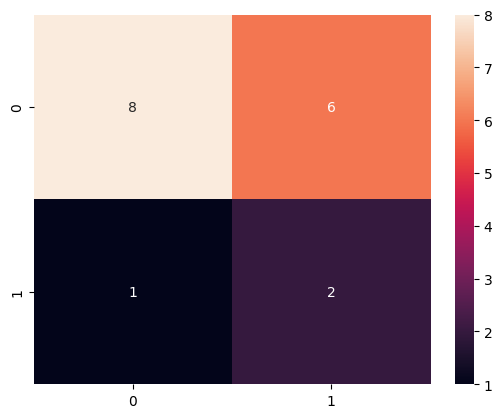

In [33]:
y_predict_test = decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [34]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.25      0.67      0.36         3

    accuracy                           0.59        17
   macro avg       0.57      0.62      0.53        17
weighted avg       0.78      0.59      0.64        17



In [36]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Age       0.499810
Start     0.330395
Number    0.169796
